In [1]:
##########################################
#          _ _,---._                     #
#       ,-','       `-.___               #
#      /-;'               `._            #
#     /\/          ._   _,'o \           #
#    ( /\       _,--'\,','"`. )          #
#     |\      ,'o     \'    //\          #
#     |      \        /   ,--'""`-.      #
#     :       \_    _/ ,-'         `-._  #
#      \        `--'  /                ) #
#       `.  \`._    ,'     ________,','  #
#         .--`     ,'  ,--` __\___,;'    #
#          \`.,-- ,' ,`_)--'  /`.,'      #
#           \( ;  | | )      (`-/        #
#             `--'| |)       |-/         #
#               | | |        | |         #
#               | | |,.,-.   | |_        #
#               | `./ /   )---`  )       #
#              _|  /    ,',   ,-'        #
#             ,'|_(    /-<._,' |--,      #
#             |    `--'---.     \/ \     #
#             |          / \    /\  \    #
#           ,-^---._     |  \  /  \  \   #
#        ,-'        \----'   \/    \--`. #
#       /            \              \   \#
##########################################
#                  Gruy                  #
##########################################

## objectif
- Gagner du fric
- En apprenant
- Prédérire l'arrivé dans les 3 premiéres places

## Import library

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
# For NLP et World Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

## Import dataset

In [3]:
df = pd.read_csv("export-1-pt-utf.csv")
df.head()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
0,0,2,0.0,1,1,17,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.3877,0.3136,0.3010,0.2500,1.0000,0.8943
1,0,8,0.0,1,4,15,Vincennes,1,01-01-2011,0,...,0.0,0.0,0.0,0.0,0.5870,0.2651,0.5870,0.7142,1.0000,0.8717
2,1,1,2.4,1,6,13,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.6358,0.7295,0.6358,0.5001,0.9697,0.0000
3,1,1,1.4,1,9,7,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.0000,0.0096,0.0000,1.0000,1.0000,0.1892
4,0,8,0.0,1,2,15,Vincennes,0,02-01-2011,0,...,1.0,1.0,1.0,0.0,0.8642,0.8798,0.8642,0.0000,0.9211,0.8555


## Déscription Features
- Place 1 si le cheval est dans les trois premiers sinon 0
- cr-reunion N° de la réunion
- cr-num N° de la course
- cr-nb_partants Nombre de partants
- cr-Hippodrome Nom de l'hippodrome
- cr-Evt Course événement ou pas
- cr-Date
- cr-autostart 1 ou 0
- cr-corde Emplacement de la corde à droite ou à gauche
- cr-etat du terrain Etat du terrain
- cr-distance Distance de la course
- Numcheval Numéro du cheval
- CoteProbable Cote probable du cheval
- Sexe H, F ou M
- NbRencontre Nombre de fois où le cheval a rencontré un des concurents dans une course précédente
- NbBattus Nombre de fois où le cheval courant a eu une meilleure place
- SommeNbRencontre Toute les fois où notre cheval a rencontré un concurrent
- SommeNbBattus Toute les fois où notre cheval a eu une meilleure place qu'un concurrent
- NumCourseJockey N° de la cours edu jockey
- QteCourseJockeyJour Nombre de course du jockey pour cette journée
- SumCote5Race Somme des cotes connues des 5 dernières courses
- MoyenneCote5Race Moyenne des cotes des 5 denrières courses
- qteCoteCheval Nombre de fois où l'on a eu une cote sur les 5 dernières courses
- ETCote5Race Ecart type des cotes des 5 dernières courses
- SumPoids Nombre de fois où le cheval avait le même poids sur les courses précédentes
- SumIdJockey Nombre de fois où le cheval avait le même jockey sur les courses précédentes
- SumidHippodrome Nombre de fois où le cheval avait le même hippodrome sur les courses précédentes
- SumIdDeferre Nombre de fois où le cheval avait la même ferrure sur les courses précédentes
- SumDistance Nombre de fois où le cheval courrait sur la même distance sur les courses précédentes
- SumAllocation Nombre de fois où le cheval avait la même allocation sur les courses précédentes
- PositionPoids Nombre de fois où le cheval a été dans les 3 premiers avec le même poids sur les courses précédentes
- PositionIdJockey Nombre de fois où le cheval a été dans les 3 premiers avec le même jockey sur les courses précédentes
- PositionidHippodrome Nombre de fois où le cheval a été dans les 3 premiers avec le même hippodrome sur les courses précédentes
- PositionIdDeferre Nombre de fois où le cheval a été dans les 3 premiers avec la même ferrure sur les courses précédentes
- PositionDistance Nombre de fois où le cheval a été dans les 3 premiers avec la même distance sur les courses précédentes
- PositionAllocation Nombre de fois où le cheval a été dans les 3 premiers avec la même allocation sur les courses précédentes
- pourcentPoids % où le cheval a été placé pour le même poids
- pourcentIdJockey % où le cheval a été placé pour le même jockey
- pourcentidHippodrome % où le cheval a été placé pour le même hippodrome
- pourcentIdDeferre % où le cheval a été placé pour la même ferrure
- pourcentDistance % où le cheval a été placé pour la même distance
- pourcentAllocation % où le cheval a été placé pour la même allocation
- SommeCourse Nombre fois où un cheval a courru
- numeroagespec % de réussite numéro age specialité
- numerodistancespec % de réussite numéro distance specialité
- numerodeferrespec % de réussite numéro ferrure specialité
- numerosexespec % de réussite numéro sexe spécialité
- numeroagesexedistancespec % de réussite numéro age sexe distance specialité
- idjockeynumcoursenbrcoursespec % de réussite
- jockeyReussite % de réussite du joskey
- jockeyReussiteSpecialite % de réussite du joskey dans la spécialité
- jockeynReussiteDistance % de réussite du jockey sur la distance
- jockeyReussiteIdcheval % de réussite du jockey avec ce cheval
- jockeyReussiteDeferre % de réussite du jockey fonction de la ferrure
- jockeynReussiteSpecialiteDeferre % de réussite du jockey fonction d ela ferrure et de la spcialité
- jockeyReussiteDistanceDeferre % de réussite du jockey distance deferre
- entraineurReussite % de réussite entraineur
- entraineurReussiteSpecialite % de réussite entraineur spécialité
- entraineurnReussiteDistance % de réussite entraineur distance
- entraineurReussiteIdcheval % de réussite entraineur avec cheval
- chevalReussite % de réussite du cheval
- chevalReussiteSpecialite % de réussite du cheval spécialité
- chevalnReussiteDistance % de réussite du cheval sur cette distance
- coteprobable Valeur de la cote
- gains Gains du cheval sur sa carrière

## Analyse Rapide

In [4]:
df.shape

(19869, 69)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19869 entries, 0 to 19868
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   place                             19869 non-null  int64  
 1   placeoptin                        19869 non-null  int64  
 2   rapport                           19869 non-null  float64
 3   cr-reunion                        19869 non-null  int64  
 4   cr-num                            19869 non-null  int64  
 5   cr-nb_partants                    19869 non-null  int64  
 6   cr-Hippodrome                     19869 non-null  object 
 7   cr-Evt                            19869 non-null  int64  
 8   cr-Date                           19869 non-null  object 
 9   cr-autostart                      19869 non-null  int64  
 10  cr-corde                          19869 non-null  object 
 11  cr-etat du terrain                19869 non-null  object 
 12  cr-d

- type int : place,cr-reunion,cr-num,cr-nb_partants,cr-Evt,cr-autostart,Numcheval,CoteProbable,SumPoids

- type float:NbRencontre,NbBattus,SommeNbRencontre,SommeNbBattus,NumCourseJockey,QteCourseJockeyJour,SumCote5Race,MoyenneCote5Race,qteCoteCheval,ETCote5Race,SumIdJockey,SumidHippodrome,SumIdDeferre,SumDistance,SumAllocation,PositionIdJockey,PositionidHippodrome,PositionIdDeferre,PositionDistance,PositionAllocation,pourcentIdJockey,pourcentidHippodrome,pourcentIdDeferre,pourcentDistance,pourcentAllocation,SommeCourse,nbjourdercourse,numeroagespec,numerodistancespec,numerodeferrespec,numerosexespec,numeroagesexedistancespec,idjockeynumcoursenbrcoursespec,jockeyReussite,jockeyReussitePlusPlace,jockeyReussiteSpecialite,jockeynReussiteDistance,jockeyReussiteIdcheval,jockeyReussiteDeferre,jockeynReussiteSpecialiteDeferre,jockeyReussiteDistanceDeferre,entraineurReussite,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
- type object (numbers + strings): cr-Hippodrome,cr-corde,cr-etat du terrain,cr-distance,Sexe
- type date: cr-date





In [6]:
df.describe()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Evt,cr-autostart,Numcheval,CoteProbable,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
count,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,...,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000,19869.000000
mean,0.553878,2.720268,0.971599,2.861392,4.672656,13.897327,0.043485,0.385978,7.757663,2.429463,...,0.468191,0.328072,0.467379,0.422362,0.341524,0.348209,0.327871,0.572291,0.417114,0.482059
std,0.497101,2.804958,0.971108,1.431727,2.393062,2.636189,0.203951,0.486838,4.335501,3.007460,...,0.356103,0.290835,0.364502,0.387001,0.305870,0.303770,0.299834,0.440042,0.402462,0.351410
min,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,3.000000,12.000000,0.000000,0.000000,4.000000,0.000000,...,0.038100,0.033800,0.102400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122400
50%,1.000000,1.000000,1.300000,3.000000,5.000000,14.000000,0.000000,0.000000,7.000000,2.000000,...,0.505200,0.289200,0.454600,0.360800,0.323600,0.326800,0.300000,0.666700,0.500000,0.510400
75%,1.000000,2.000000,1.700000,4.000000,7.000000,16.000000,0.000000,1.000000,11.000000,4.000000,...,0.799100,0.529900,0.777800,0.750000,0.579300,0.580700,0.552600,1.000000,0.769200,0.800000
max,1.000000,8.000000,8.000000,9.000000,12.000000,20.000000,1.000000,1.000000,20.000000,70.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.nunique()

place                          2
placeoptin                     3
rapport                       59
cr-reunion                     9
cr-num                        12
                            ... 
chevalReussitePlusPlace     6874
chevalReussiteSpecialite    6173
chevalnReussiteDistance      662
coteprobable                 465
gains                       6109
Length: 69, dtype: int64

In [8]:
df.isnull().sum()

place                       0
placeoptin                  0
rapport                     0
cr-reunion                  0
cr-num                      0
                           ..
chevalReussitePlusPlace     0
chevalReussiteSpecialite    0
chevalnReussiteDistance     0
coteprobable                0
gains                       0
Length: 69, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF6262CDC8>,
      dtype=object)

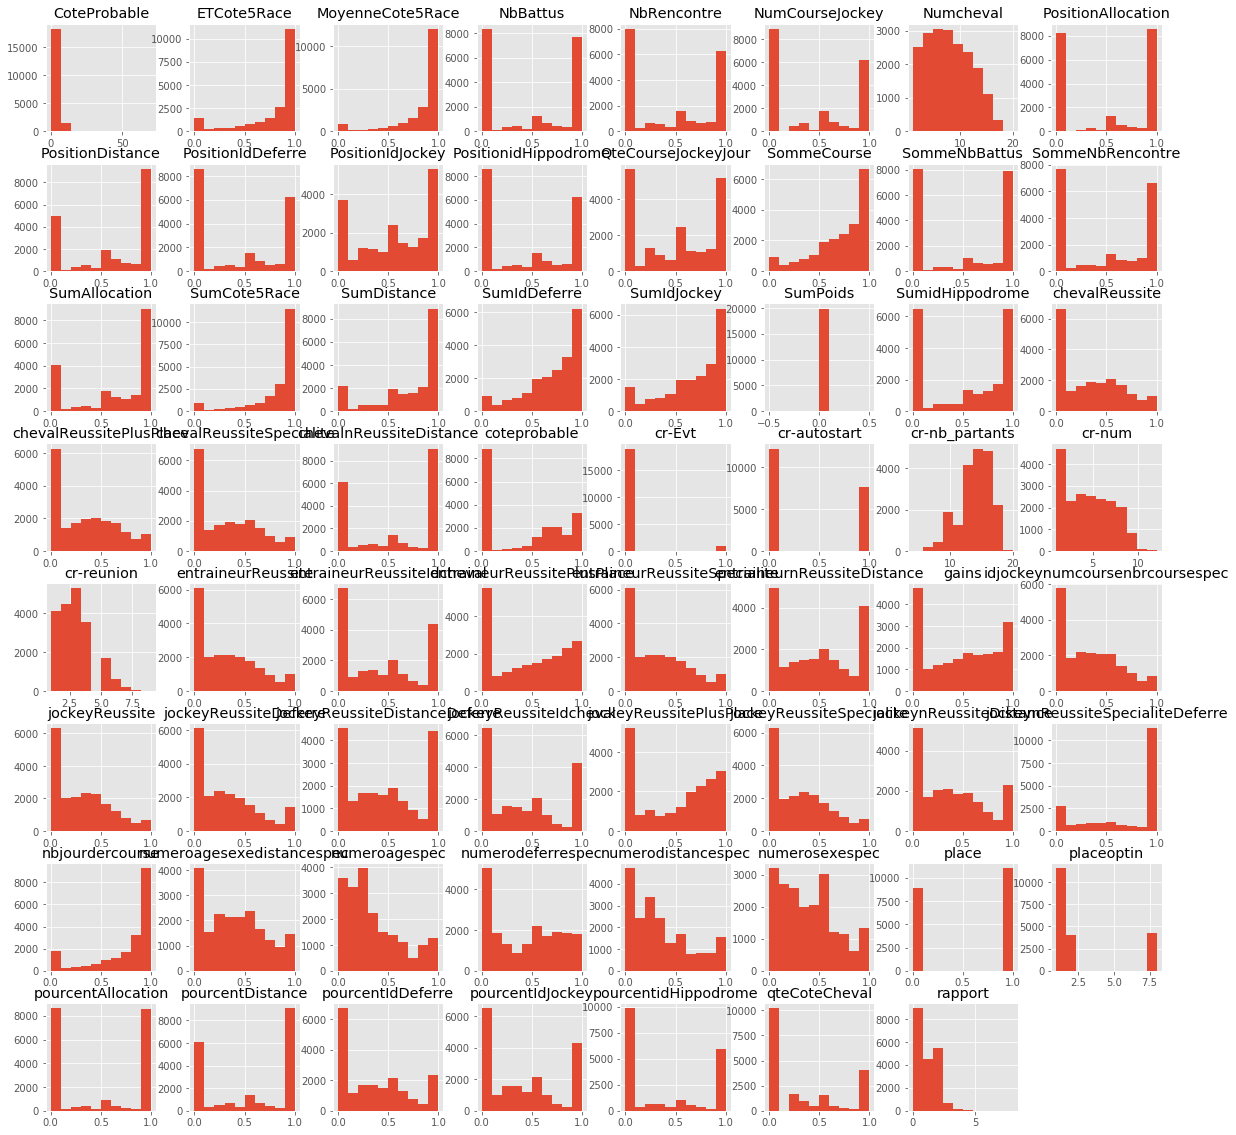

In [9]:
df.hist(figsize= (20,20))

## Graphe densité

In [10]:
# Ne fonctionne pas totalement a refaire
#df.plot(kind='density', subplots=True, layout = (8,8), sharex=False, sharey=False, figsize=(20,10))

In [11]:
# Ne fonctionne pas totalement a refaire
#df.plot.kde()

In [12]:
df.corr()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Evt,cr-autostart,Numcheval,CoteProbable,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
place,1.000000,-0.683378,0.897946,0.028668,0.007888,-0.122218,-0.001266,0.018159,0.008639,-0.097372,...,-0.078205,-0.076029,-0.054432,-0.079176,-0.095382,-0.086051,-0.093247,-0.046562,0.010726,-0.199561
placeoptin,-0.683378,1.000000,-0.613636,-0.036664,-0.015884,0.111838,0.003668,-0.009758,-0.050568,0.068710,...,0.034087,0.039196,0.029975,0.074762,0.081768,0.079367,0.080568,0.040313,0.001381,0.157735
rapport,0.897946,-0.613636,1.000000,-0.012439,0.004751,-0.003518,0.008548,-0.005620,0.024252,-0.013593,...,-0.020072,-0.021630,-0.003172,0.005961,-0.002416,0.002719,-0.002084,0.000971,0.005966,-0.151129
cr-reunion,0.028668,-0.036664,-0.012439,1.000000,-0.030181,-0.169971,-0.198439,0.291513,-0.110086,-0.338955,...,0.003236,0.047941,-0.007046,0.007378,-0.015234,-0.021496,-0.002602,-0.063727,-0.469089,0.042151
cr-num,0.007888,-0.015884,0.004751,-0.030181,1.000000,-0.039172,-0.206166,-0.025990,0.012622,-0.027119,...,0.006515,0.005033,0.015754,0.004430,0.001933,-0.006433,0.001246,0.030598,-0.036022,-0.017492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chevalReussitePlusPlace,-0.086051,0.079367,0.002719,-0.021496,-0.006433,0.071890,0.030740,-0.012930,-0.084644,0.093572,...,0.087980,0.159023,0.078409,0.267889,0.948121,1.000000,0.924895,0.144339,-0.000309,0.131040
chevalReussiteSpecialite,-0.093247,0.080568,-0.002084,-0.002602,0.001246,0.043087,-0.007351,0.005304,-0.057652,0.081289,...,0.106129,0.178708,0.085672,0.272026,0.972812,0.924895,1.000000,0.137592,-0.029184,0.113965
chevalnReussiteDistance,-0.046562,0.040313,0.000971,-0.063727,0.030598,0.140454,-0.021601,-0.071711,0.069951,0.055602,...,0.034888,0.032579,0.141635,0.135570,0.142698,0.144339,0.137592,1.000000,0.023626,-0.017022
coteprobable,0.010726,0.001381,0.005966,-0.469089,-0.036022,0.115658,0.298671,-0.195343,0.077238,0.486496,...,-0.049046,-0.040388,-0.046938,-0.077386,-0.016822,-0.000309,-0.029184,0.023626,1.000000,-0.033887


## Data Exploration viz
- A revoir pour graphe cohérent et utile

In [13]:
import seaborn as sns

In [14]:
categorical_attributes = df[['cr-Hippodrome', 'cr-Date', 'cr-corde', 'cr-etat du terrain','place']]


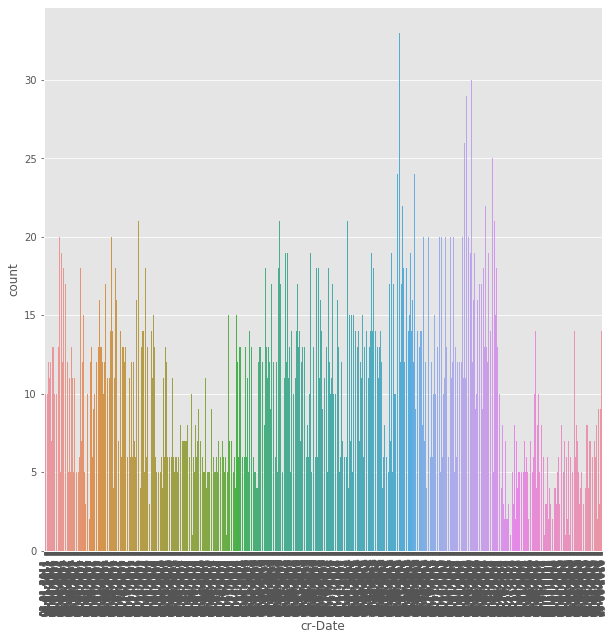

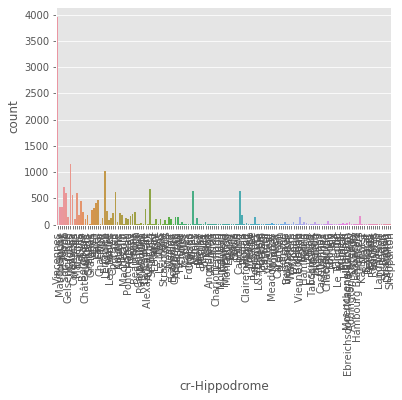

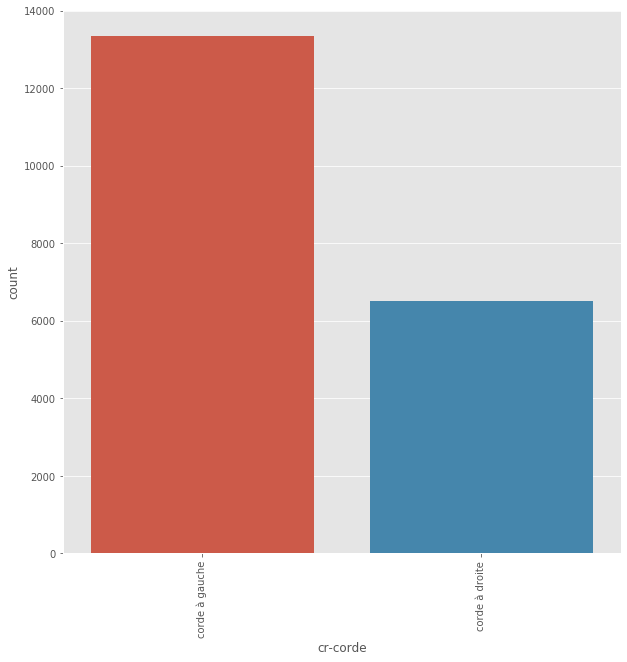

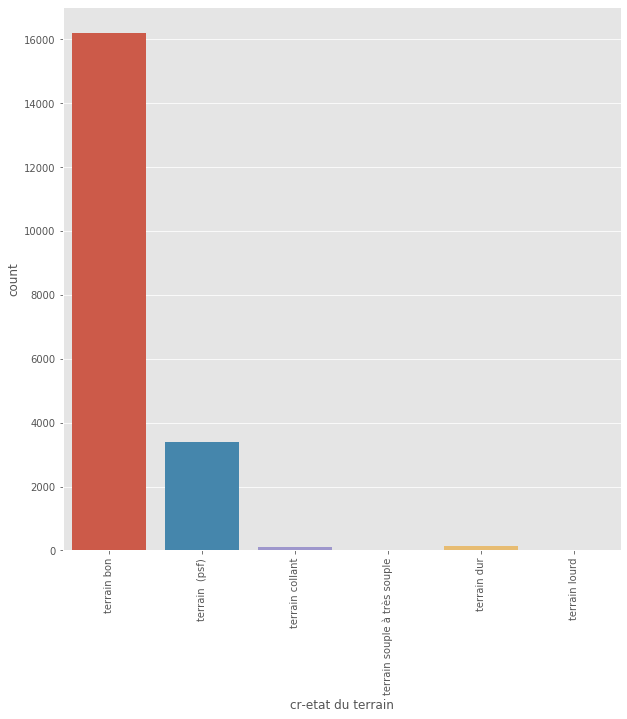

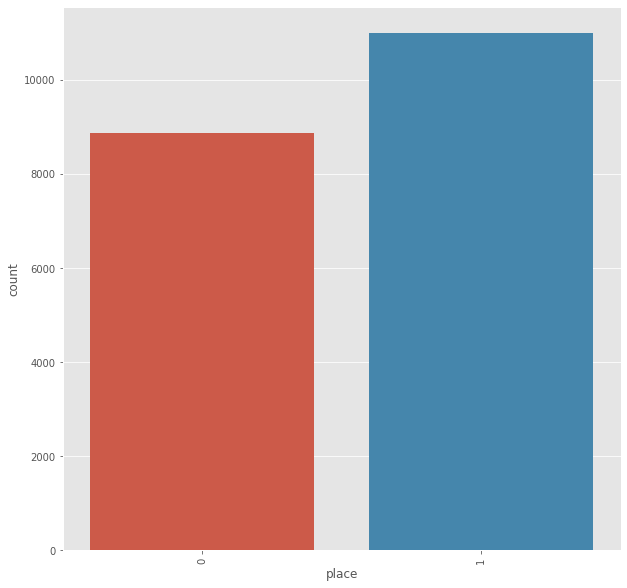

<Figure size 720x720 with 0 Axes>

In [15]:
for i, attribute in enumerate(categorical_attributes):
    # Set the width and height of the figure
    plt.figure(figsize=(10,10))
    plt.figure(i)
    sns.countplot(categorical_attributes[attribute])
    plt.xticks(rotation=90)

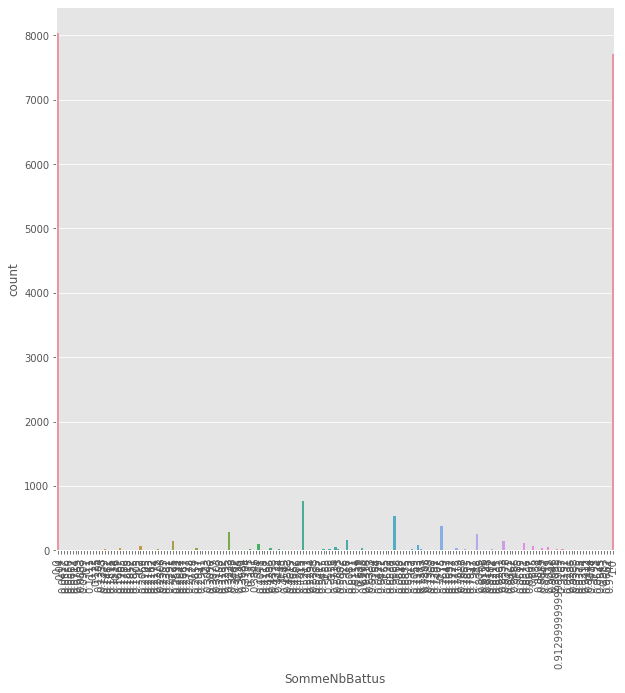

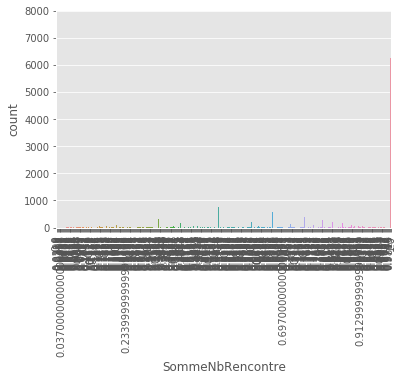

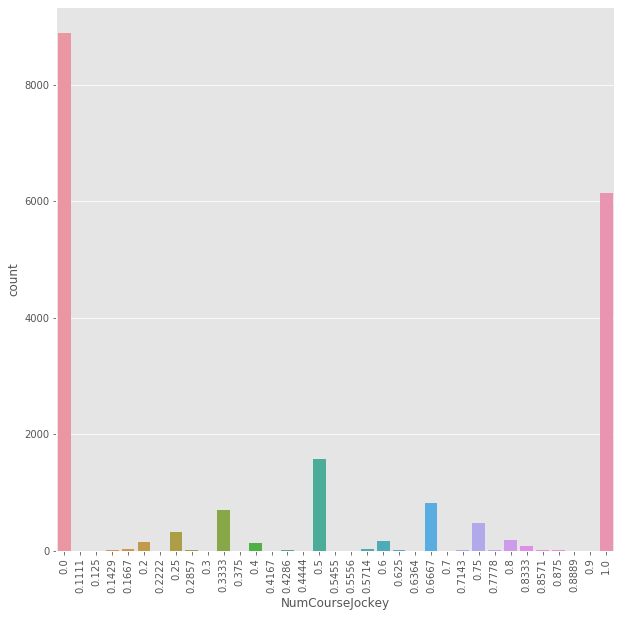

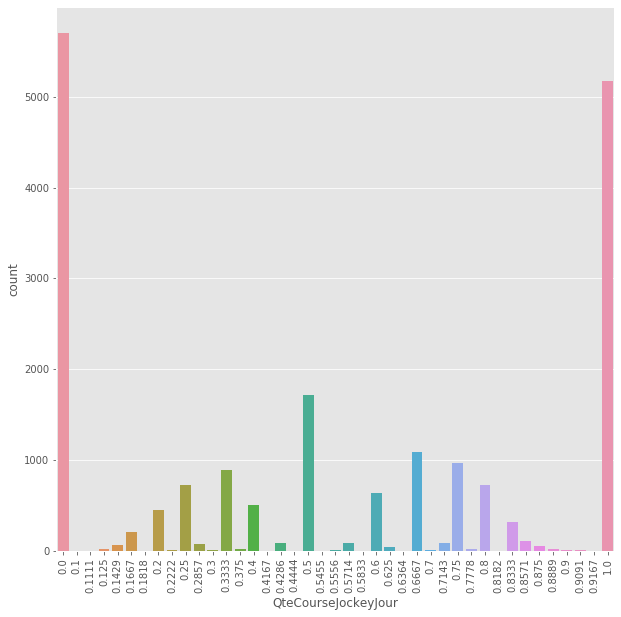

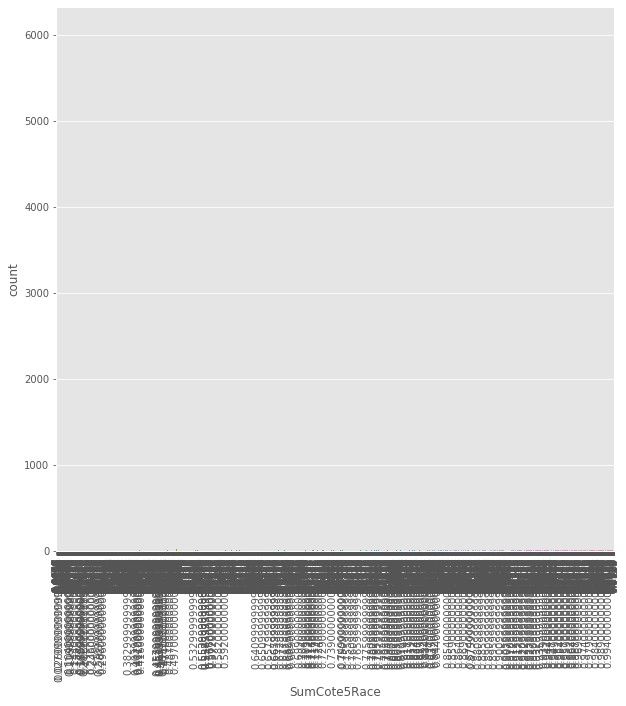

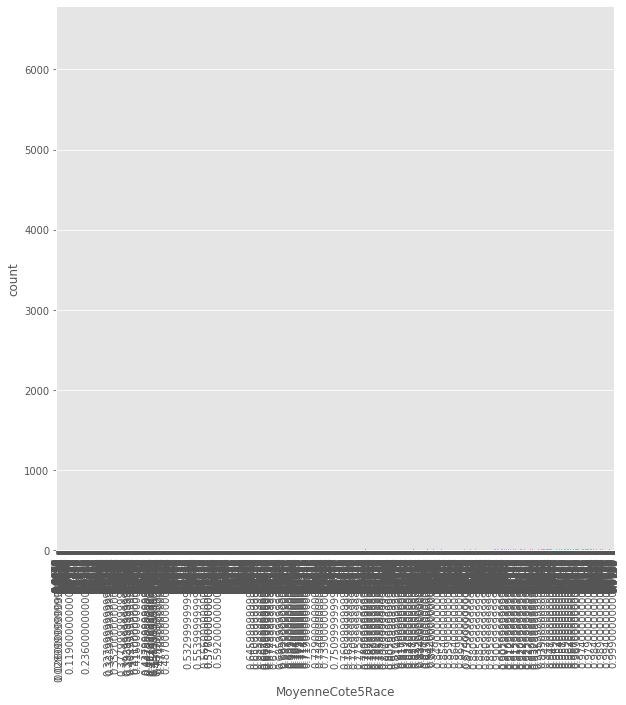

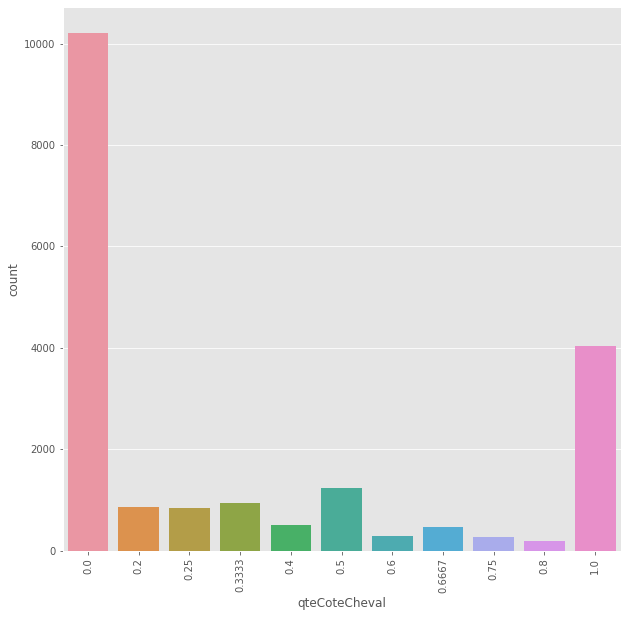

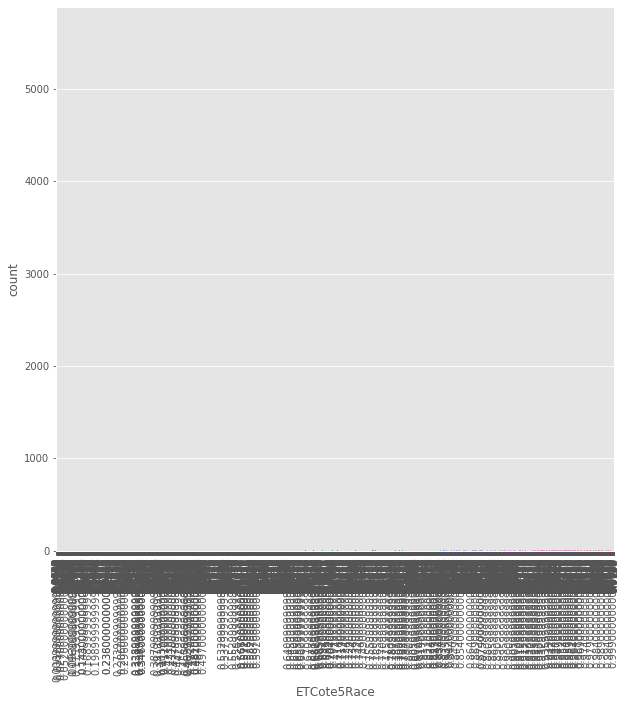

<Figure size 720x720 with 0 Axes>

In [17]:
for i, attribute in enumerate(categorical_attributes):
    # Set the width and height of the figure
    plt.figure(figsize=(10,10))
    plt.figure(i)
    sns.countplot(categorical_attributes[attribute])
    plt.xticks(rotation=90)

## Worlds Clouds
- A voir opitimé (transformer int en str ????)

In [18]:
df.head()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
0,0,2,0.0,1,1,17,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.3877,0.3136,0.3010,0.2500,1.0000,0.8943
1,0,8,0.0,1,4,15,Vincennes,1,01-01-2011,0,...,0.0,0.0,0.0,0.0,0.5870,0.2651,0.5870,0.7142,1.0000,0.8717
2,1,1,2.4,1,6,13,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.6358,0.7295,0.6358,0.5001,0.9697,0.0000
3,1,1,1.4,1,9,7,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.0000,0.0096,0.0000,1.0000,1.0000,0.1892
4,0,8,0.0,1,2,15,Vincennes,0,02-01-2011,0,...,1.0,1.0,1.0,0.0,0.8642,0.8798,0.8642,0.0000,0.9211,0.8555


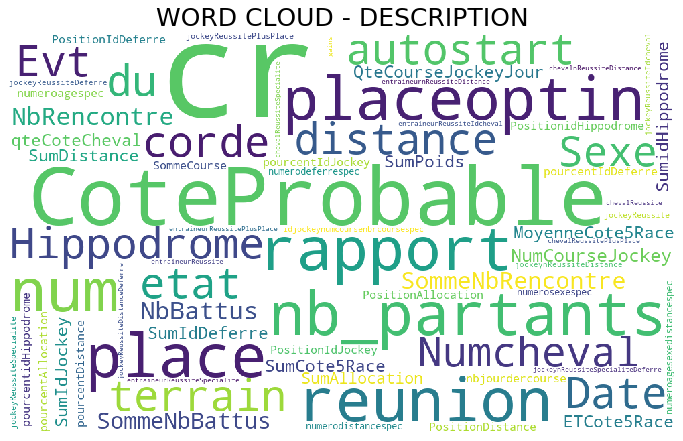

In [19]:
stopwords = set(STOPWORDS)
newStopWords = ['cr-Hippodrome', 'cr-Date', 'cr-corde', 'cr-etat du terrain']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df.astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

In [20]:
### replace  0 et 1 by  pas_dans_les_3 et dans_les_3
df['place'].replace((0, 1 ), ('pas_dans_les_3', 'dans_les_3'), inplace = True)
df.head()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
0,pas_dans_les_3,2,0.0,1,1,17,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.3877,0.3136,0.3010,0.2500,1.0000,0.8943
1,pas_dans_les_3,8,0.0,1,4,15,Vincennes,1,01-01-2011,0,...,0.0,0.0,0.0,0.0,0.5870,0.2651,0.5870,0.7142,1.0000,0.8717
2,dans_les_3,1,2.4,1,6,13,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.6358,0.7295,0.6358,0.5001,0.9697,0.0000
3,dans_les_3,1,1.4,1,9,7,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.0000,0.0096,0.0000,1.0000,1.0000,0.1892
4,pas_dans_les_3,8,0.0,1,2,15,Vincennes,0,02-01-2011,0,...,1.0,1.0,1.0,0.0,0.8642,0.8798,0.8642,0.0000,0.9211,0.8555


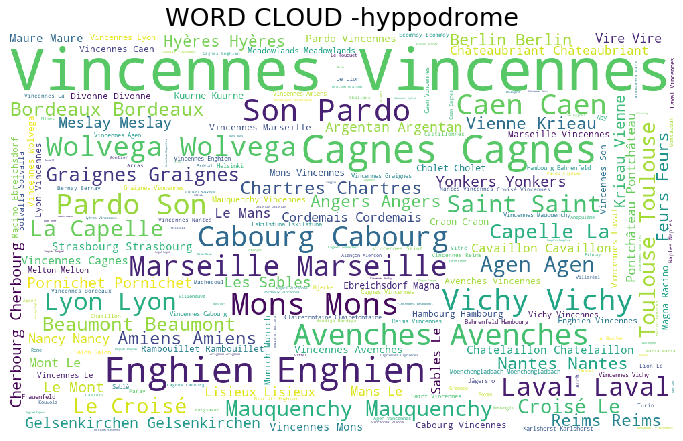

In [21]:
stopwords = set(STOPWORDS)
newStopWords = ['cr-Date', 'cr-corde', 'cr-etat du terrain','place']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df['cr-Hippodrome'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD -hyppodrome", fontsize=25)
plt.axis('off')
plt.show()

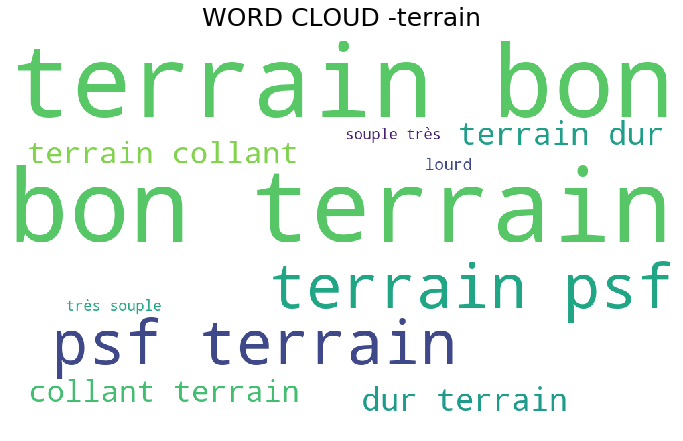

In [22]:
stopwords = set(STOPWORDS)
newStopWords = ['cr-Date', 'cr-corde', 'cr-etat du terrain','place','cr-Hippodrome']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df['cr-etat du terrain'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD -terrain", fontsize=25)
plt.axis('off')
plt.show()

### ML

### Parceque j'aime bien.
- c beau

In [24]:
# replace colonne place
df['place'].replace(('pas_dans_les_3', 'dans_les_3'),(0, 1 ), inplace = True)
df.head()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Hippodrome,cr-Evt,cr-Date,cr-autostart,...,entraineurReussitePlusPlace,entraineurReussiteSpecialite,entraineurnReussiteDistance,entraineurReussiteIdcheval,chevalReussite,chevalReussitePlusPlace,chevalReussiteSpecialite,chevalnReussiteDistance,coteprobable,gains
0,0,2,0.0,1,1,17,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.3877,0.3136,0.3010,0.2500,1.0000,0.8943
1,0,8,0.0,1,4,15,Vincennes,1,01-01-2011,0,...,0.0,0.0,0.0,0.0,0.5870,0.2651,0.5870,0.7142,1.0000,0.8717
2,1,1,2.4,1,6,13,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.6358,0.7295,0.6358,0.5001,0.9697,0.0000
3,1,1,1.4,1,9,7,Vincennes,0,01-01-2011,1,...,0.0,0.0,0.0,0.0,0.0000,0.0096,0.0000,1.0000,1.0000,0.1892
4,0,8,0.0,1,2,15,Vincennes,0,02-01-2011,0,...,1.0,1.0,1.0,0.0,0.8642,0.8798,0.8642,0.0000,0.9211,0.8555


### dummies get_dummies
- parti a revoir probleme de suppression de colonne

In [25]:
# import function dummies
def dummies(dataset, column):
    dummies = pd.get_dummies(dataset, drop_first=True, prefix=column )
    dataset = pd.concat([dataset,dummies],axis=1)
    return dataset

In [26]:
df_reunion = dummies(df, 'cr-reunion')
df_num = dummies(df, 'cr-num')
df_Evt = dummies(df, 'cr-Evt')
df_autostart = dummies(df, 'cr-autostart')
df_corde = dummies(df, 'cr-corde')
df_etat_du_terrain = dummies(df, 'cr-etat du terrain')
df_distance = dummies(df, 'cr-distance')
df_sexe = dummies(df, 'Sexe')
df_date = dummies(df, "cr-Date")

In [27]:
# dummies colonne
df_hippo = pd.get_dummies(df['cr-Hippodrome'], prefix = 'cr-Hippodrome', drop_first=True)
df = pd.concat([df,df_hippo],axis=1)
df = df.drop(['cr-Hippodrome'], axis = 1)
# ['cr-Hippodrome', 'cr-Date', 'cr-corde', 'cr-etat du terrain']

In [28]:
# verif
df.head()

,place,placeoptin,rapport,cr-reunion,cr-num,cr-nb_partants,cr-Evt,cr-Date,cr-autostart,cr-corde,...,cr-Hippodrome_Vienne Krieau,cr-Hippodrome_Villeneuve,cr-Hippodrome_Villeréal,cr-Hippodrome_Vincennes,cr-Hippodrome_Vire,cr-Hippodrome_Vitré,cr-Hippodrome_Vittel,cr-Hippodrome_Waregem,cr-Hippodrome_Wolvega,cr-Hippodrome_Yonkers
0,0,2,0.0,1,1,17,0,01-01-2011,1,corde à gauche,...,0,0,0,1,0,0,0,0,0,0
1,0,8,0.0,1,4,15,1,01-01-2011,0,corde à gauche,...,0,0,0,1,0,0,0,0,0,0
2,1,1,2.4,1,6,13,0,01-01-2011,1,corde à gauche,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1.4,1,9,7,0,01-01-2011,1,corde à gauche,...,0,0,0,1,0,0,0,0,0,0
4,0,8,0.0,1,2,15,0,02-01-2011,0,corde à gauche,...,0,0,0,1,0,0,0,0,0,0


### import librairies for Ml

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

### Drop colonne inutile et creation cible ml

In [30]:
X = df.drop(["place", "cr-Date","cr-reunion", "cr-num", "cr-Evt", "cr-autostart", "cr-corde", "cr-etat du terrain", "cr-distance", "Sexe" ],1)   #Feature Matrix
y = df["place"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [31]:
X.head()

,placeoptin,rapport,cr-nb_partants,Numcheval,CoteProbable,NbRencontre,NbBattus,SommeNbRencontre,SommeNbBattus,NumCourseJockey,...,cr-Hippodrome_Vienne Krieau,cr-Hippodrome_Villeneuve,cr-Hippodrome_Villeréal,cr-Hippodrome_Vincennes,cr-Hippodrome_Vire,cr-Hippodrome_Vitré,cr-Hippodrome_Vittel,cr-Hippodrome_Waregem,cr-Hippodrome_Wolvega,cr-Hippodrome_Yonkers
0,2.0,0.0,17.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,0.0,15.0,12.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.4,13.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.4,7.0,7.0,2.0,0.0,0.0,0.0,0.0,0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,15.0,10.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split dataset for training

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### features Selection

In [33]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

In [34]:
print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)

X_important_train Shape:  (13908, 3)
X_important_test Shape:  (5961, 3)


### Test de plusieur modéle et comparon les scores
- erreur du au valeur manquante non travaillé

LogReg: 0.997771 (+/- 0.001353)
XGBClassifier: 0.999928 (+/- 0.000144)
KNN: 0.999856 (+/- 0.000176)
DecisionTreeClassifier: 0.999928 (+/- 0.000144)
RandomForestClassifier: 0.999856 (+/- 0.000176)
GradientBoostingClassifier: nan (+/- nan)
RidgeClassifier: 0.996621 (+/- 0.001376)
BaggingRidgeClassifier: 0.999928 (+/- 0.000144)
ExtraTreesClassifier: 0.999856 (+/- 0.000176)


E:\systeme\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
E:\systeme\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
E:\systeme\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
E:\systeme\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


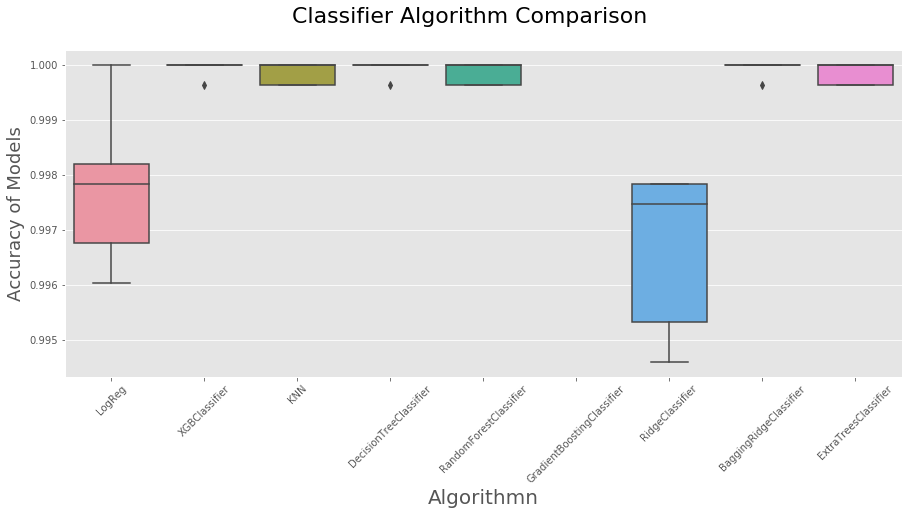

In [35]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

### Test des 3 "Meilleures"
- pour le fun vu que la parti précedente est fausse

In [36]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha':[0.001, 0.1, 1.0],
                'tol':[0.1, 0.01, 0.001], 
                'solver':['auto', 'svd', 'cholesky','lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = RidgeClassifier()
    
Ridge_model = GridSearchCV(estimator = ridge, param_grid=params_ridge, 
                           verbose=1, n_jobs = -1, 
                           cv=5)

# Fit the random search model
Ridge_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [37]:
print("Training score data: ")
print(Ridge_model.score(X_important_train, y_train) )
print("Ridge Best Parameters: ")
print(Ridge_model.best_params_ )

Training score data: 
0.9966206499856198
Ridge Best Parameters: 
{'alpha': 0.001, 'solver': 'auto', 'tol': 0.1}


#### sorton notre plus belle prediction
- toujours pour le fun

In [38]:
Ridge_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
Ridge_model.fit(X_important_train, y_train)
y_pred = Ridge_model.predict(X_important_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9969803724207348
[[2690    0]
 [  18 3253]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2690
         1.0       1.00      0.99      1.00      3271

    accuracy                           1.00      5961
   macro avg       1.00      1.00      1.00      5961
weighted avg       1.00      1.00      1.00      5961



In [39]:
param_LogReg = {
                "C": [0.5, 1, 1.5], 
                "max_iter" : [500, 1000, 2000]
}

LogReg = LogisticRegression()

LogReg_model = GridSearchCV(estimator = LogReg, 
                        param_grid = param_LogReg, 
                        scoring='accuracy',
                        cv=5,
                        verbose = 1)

LogReg_model.fit(X_important_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 1.5], 'max_iter': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [40]:
print("Training score data: ")
print(LogReg_model.score(X_important_train, y_train) )
print("Ridge Best Parameters: ")
print(LogReg_model.best_params_ )

Training score data: 
0.9999280989358642
Ridge Best Parameters: 
{'C': 0.5, 'max_iter': 500}


In [41]:
LogReg_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
LogReg_model.fit(X_important_train, y_train)
y_pred = LogReg_model.predict(X_important_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9969803724207348
[[2690    0]
 [  18 3253]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2690
         1.0       1.00      0.99      1.00      3271

    accuracy                           1.00      5961
   macro avg       1.00      1.00      1.00      5961
weighted avg       1.00      1.00      1.00      5961

